In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
def draw(folder, node_num):
    filenames = [f"{folder}r{i}-tacc-poison-100.log" for i in range(0, node_num)]

    data = {f"node{i}": [] for i in range(1, node_num+1)}

    for i, filename in enumerate(filenames, 1):
        with open(filename, 'r') as file:
            data[f"node{i}"] = [float(line.strip()) for line in file if line.strip()]

    plt.figure(figsize=(15, 6))
    for node, values in data.items():
        plt.plot(values, label=node)

    plt.xlabel('epoch')
    plt.ylabel('poison_acc')
    plt.legend()
    plt.show()

In [19]:
def cal_avg(folder, node_num):
    filenames = [os.path.join(folder, f"r{i}-tacc-poison-100.log") for i in range(0, node_num)]
    
    all_epochs = []

    for filename in filenames:
        with open(filename, 'r') as file:
            values = [float(line.strip()) for line in file if line.strip()]
            all_epochs.append(values)

    averages = [sum(epoch_values) / node_num for epoch_values in zip(*all_epochs)]
    
    return averages

In [30]:
def draw_together(folders, node_num, legends):
    plt.figure(figsize=(15, 6))
    
    marker = '^'
    for i, folder in enumerate(folders):
        averages = cal_avg(folder, node_num)
        sample_avgs = averages[:15]
        epochs = list(range(1, 3001, 200))
        plt.plot(epochs, sample_avgs, marker=marker, label=legends[i])
    
    plt.xlabel('epoch')
    plt.ylabel('poison_acc')
    plt.legend()
    plt.show()

In [28]:
def draw_mnist_together(folders, node_num, legends):
    plt.figure(figsize=(15, 6))
    
    marker = '^'
    for i, folder in enumerate(folders):
        averages = cal_avg(folder, node_num)
        sample_avgs = averages[:40]
        epochs = list(range(1, 201, 5))
        plt.plot(epochs, sample_avgs, marker=marker, label=legends[i])
    
    plt.xlabel('epoch')
    plt.ylabel('poison_acc')
    plt.legend()
    plt.show()

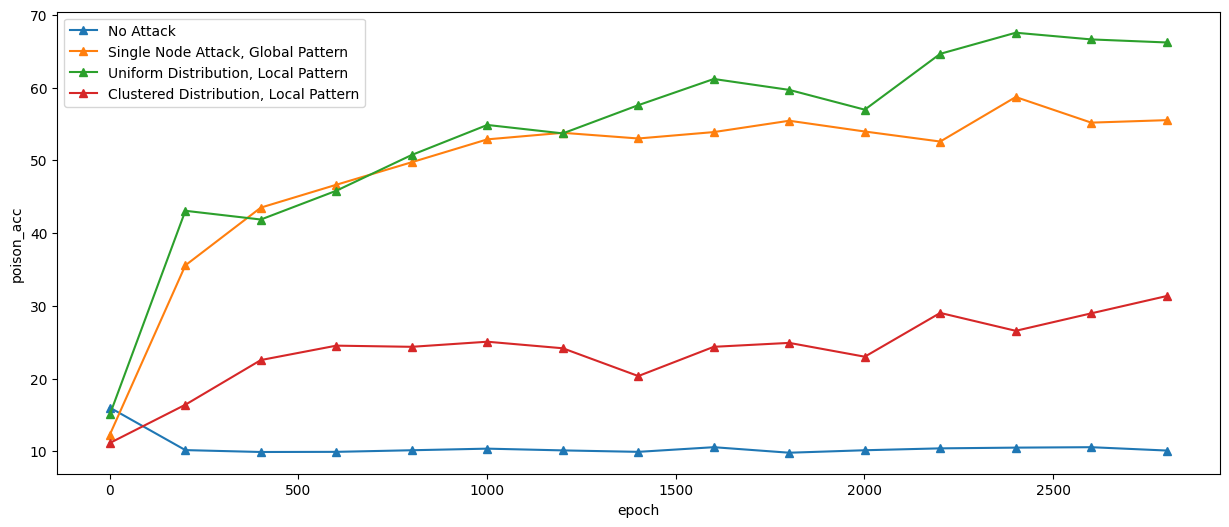

In [44]:
folders = ['Output/DBA-ring-swift-iid-DBA-0-3001/adv3-all/',
           'Output/DBA-ring-swift-iid-DBA-1-1g-3000/adv3-all/',
           'Output/DBA-ring-swift-iid-DBA-1-3001/adv3-all/',
           'Output/DBA-ring-swift-iid-DBA-1-cluster-4l-3000/adv3-all/',]
legends = ['No Attack',
           'Single Node Attack, Global Pattern',
           'Uniform Distribution, Local Pattern',
           'Clustered Distribution, Local Pattern']
draw_together(folders, 10, legends)

# SWIFT

## CIFAR

### ring

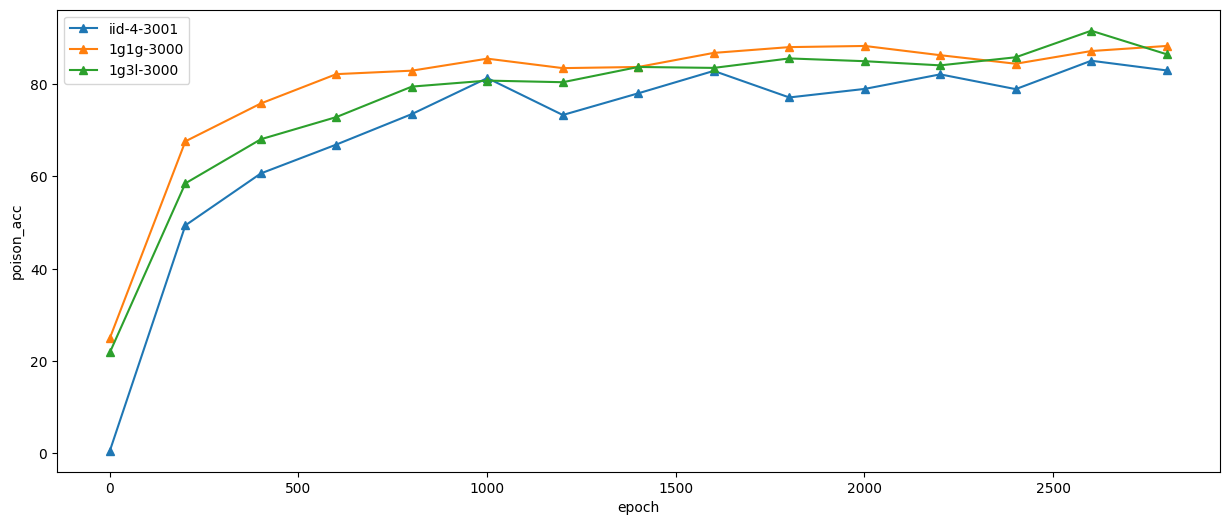

In [22]:
folders = ['Output/DBA-ring-swift-iid-DBA-4-3001/adv3-all/',
           'Output/DBA-ring-swift-iid-DBA-4-1g3l-3000/adv3-all/',
           'Output/DBA-ring-swift-iid-DBA-4-1g1g-3000-old/adv3-all/']
legends = ['iid-4-3001', '1g1g-3000', '1g3l-3000']
draw_together(folders, 4, legends)

### clique ring

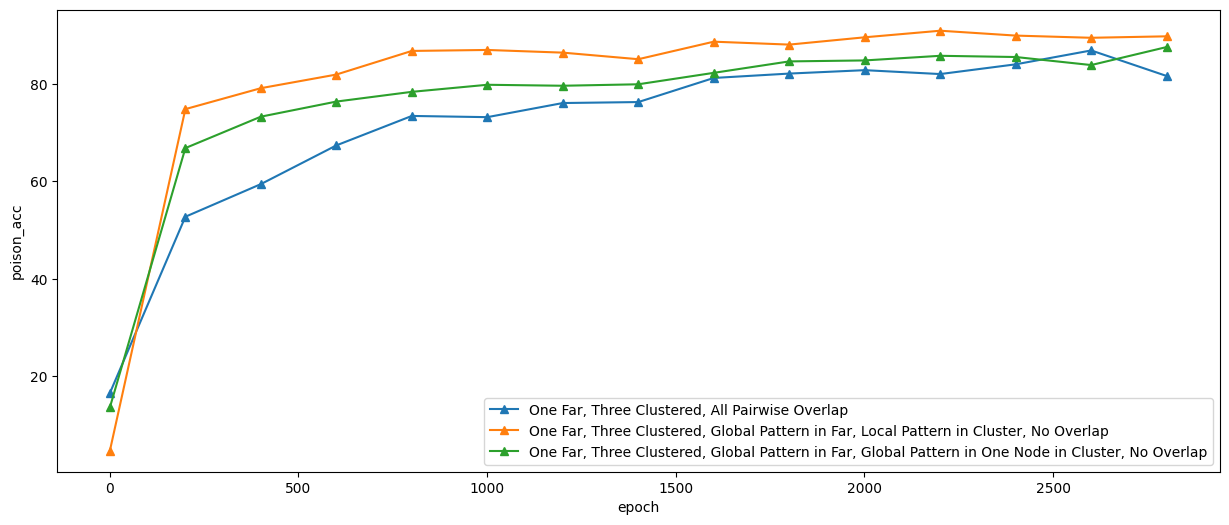

In [23]:
folders = ['Output/DBA-clique-ring-swift-iid-DBA-4-3001/adv3-all/',
           'Output/DBA-clique-ring-swift-iid-DBA-4-1g3l-3000/adv3-all/',
           'Output/DBA-clique-ring-swift-iid-DBA-4-1g1g-3000/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_together(folders, 4, legends)

## MNIST

### ring

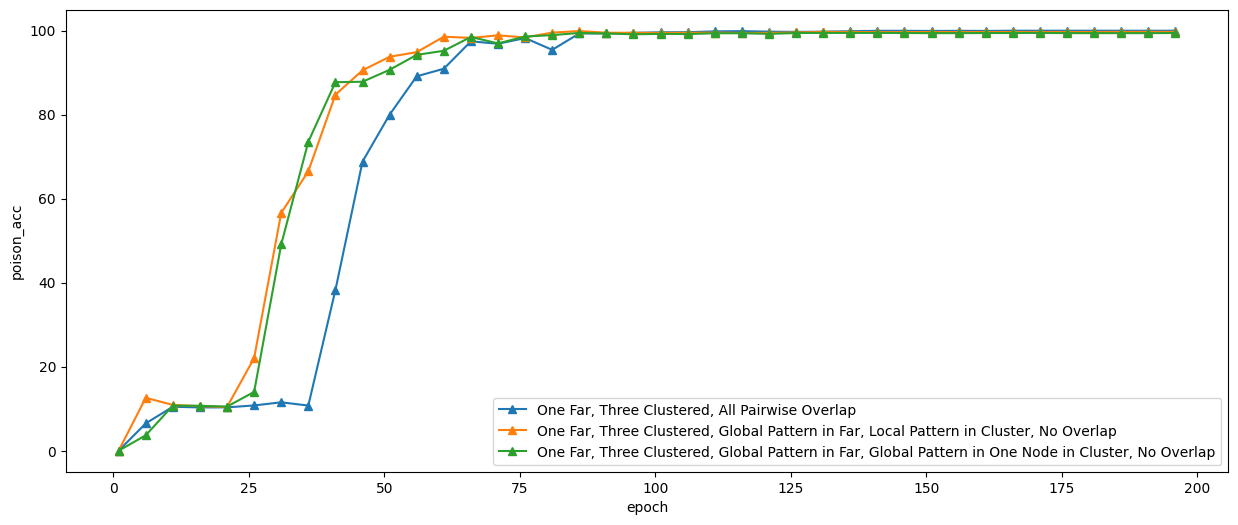

In [24]:
folders = ['Output/DBA-ring-swift-iid-DBA-mnist-4-200/adv3-all/',
           'Output/DBA-ring-dsgd-iid-DBA-mnist-4-1g3l-200/adv3-all/',
           'Output/DBA-ring-dsgd-iid-DBA-mnist-4-1g1g-200/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_mnist_together(folders, 4, legends)

### clique ring

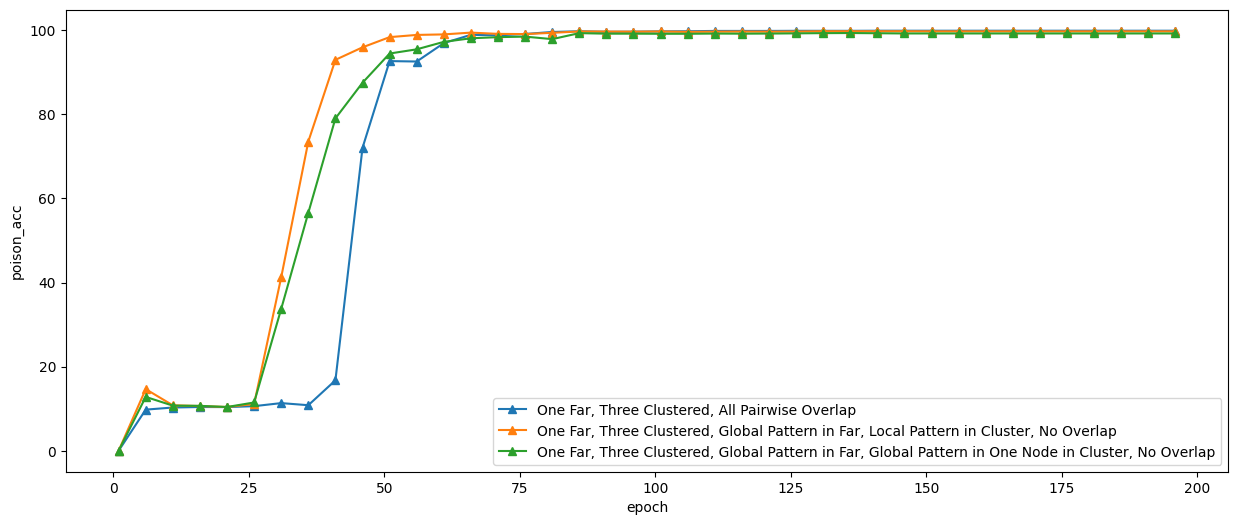

In [31]:
folders = ['Output/DBA-clique-ring-swift-iid-DBA-mnist-4-200/adv3-all/',
           'Output/DBA-clique-ring-dsgd-iid-DBA-mnist-4-1g3l-200/adv3-all/',
           'Output/DBA-clique-ring-dsgd-iid-DBA-mnist-4-1g1g-200/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_mnist_together(folders, 4, legends)

# DSGD

## CIFAR

### ring

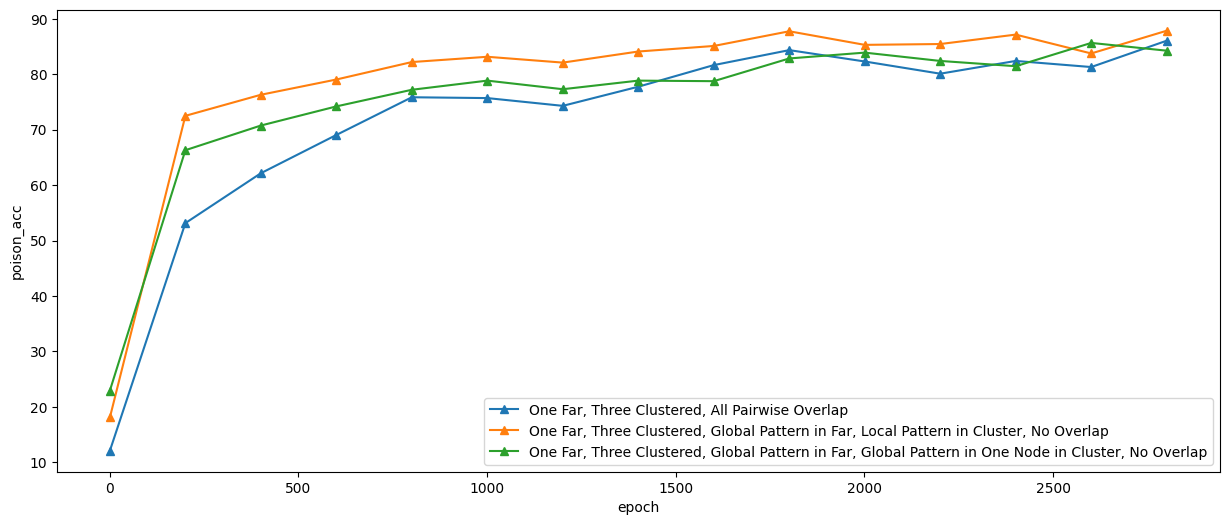

In [32]:
folders = ['Output/DBA-ring-dsgd-iid-DBA-4-3000/adv3-all/',
           'Output/DBA-ring-dsgd-iid-DBA-4-1g3l-3000/adv3-all/',
           'Output/DBA-ring-dsgd-iid-DBA-4-1g1g-3000/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_together(folders, 4, legends)

### clique ring

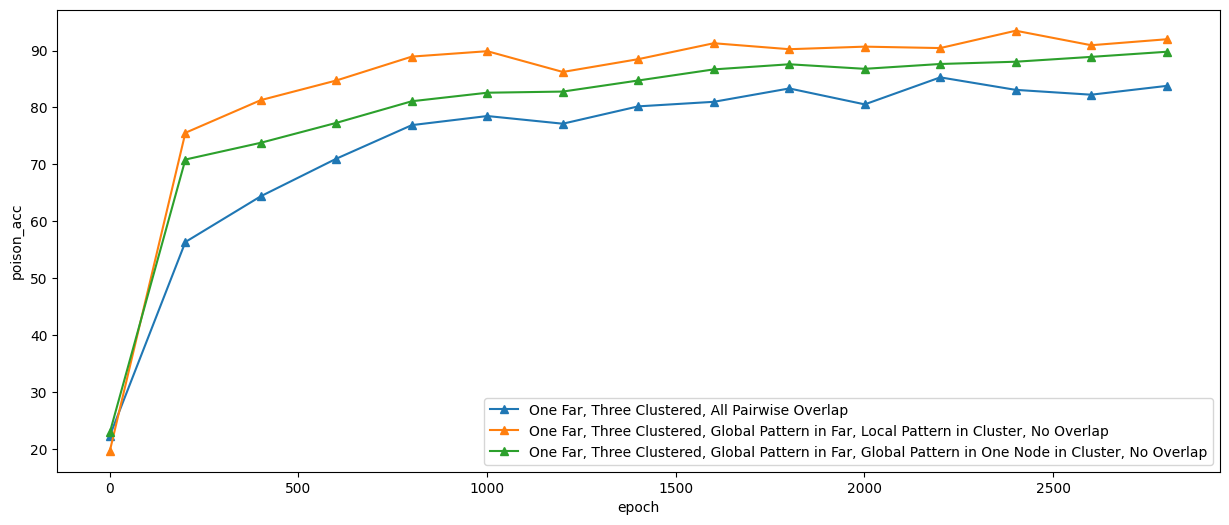

In [34]:
folders = ['Output/DBA-clique-ring-dsgd-iid-DBA-4-3000/adv3-all/',
           'Output/DBA-clique-ring-dsgd-iid-DBA-4-1g3l-3000/adv3-all/',
           'Output/DBA-clique-ring-dsgd-iid-DBA-4-1g1g-3000/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_together(folders, 4, legends)

## MNIST

### ring

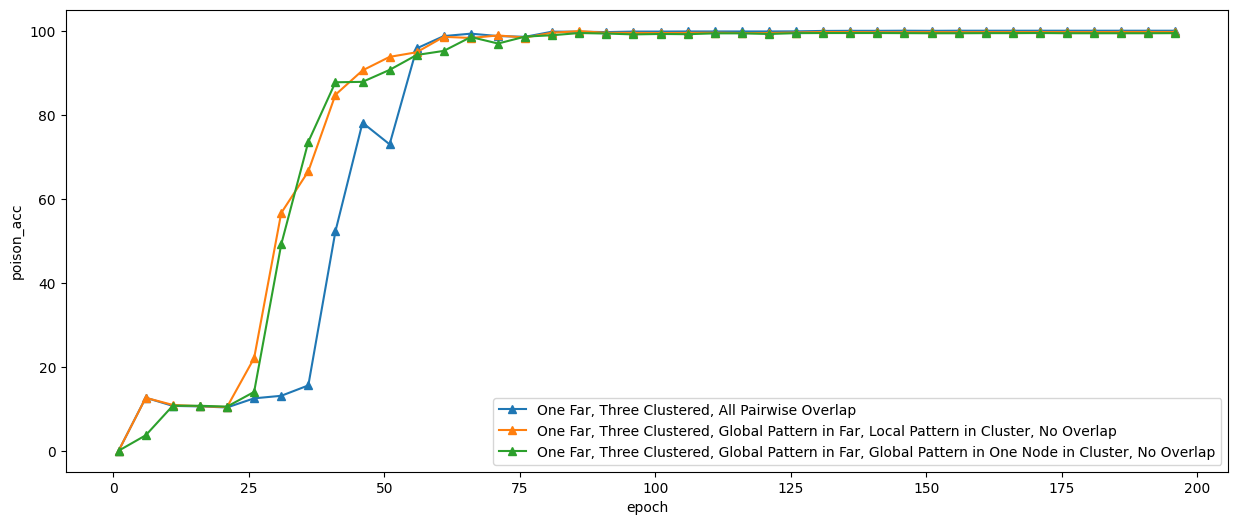

In [35]:
folders = ['Output/DBA-ring-dsgd-iid-DBA-mnist-4-200/adv3-all/',
           'Output/DBA-ring-dsgd-iid-DBA-mnist-4-1g3l-200/adv3-all/',
           'Output/DBA-ring-dsgd-iid-DBA-mnist-4-1g1g-200/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_mnist_together(folders, 4, legends)

### clique ring

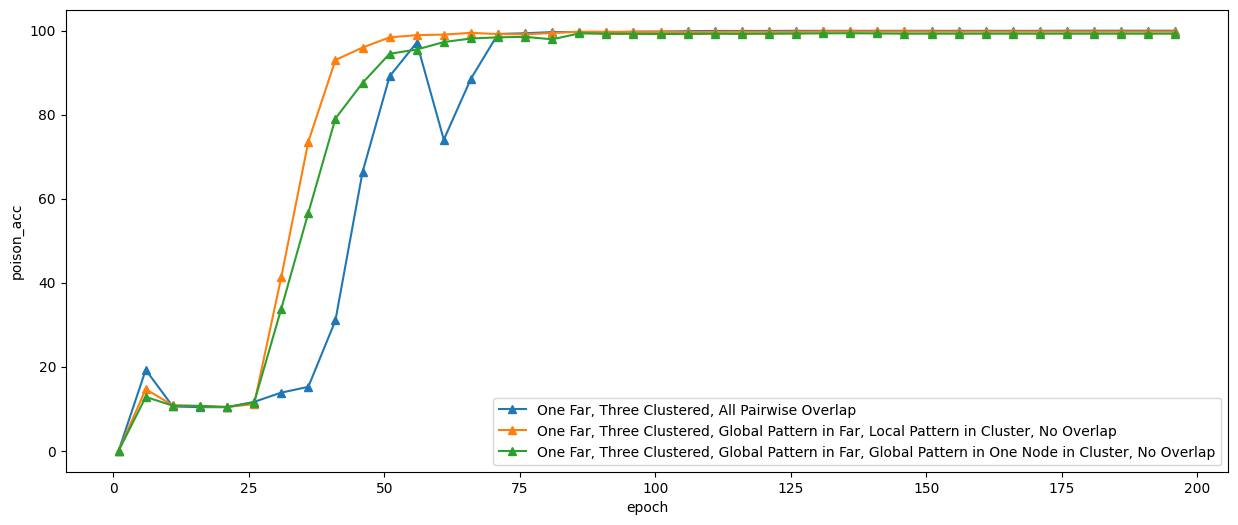

In [36]:
folders = ['Output/DBA-clique-ring-dsgd-iid-DBA-mnist-4-200/adv3-all/',
           'Output/DBA-clique-ring-dsgd-iid-DBA-mnist-4-1g3l-200/adv3-all/',
           'Output/DBA-clique-ring-dsgd-iid-DBA-mnist-4-1g1g-200/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_mnist_together(folders, 4, legends)